In [1]:
import pandas as pd
import re
from difflib import get_close_matches
df = pd.read_csv("data/PRESCRIPTION.csv")
df_ref = pd.read_excel("data/bdd_c.xlsx")

In [136]:
df_ref12 = pd.read_excel("data/bdd_c.xlsx")

# lire et nettoyage  bdd remplis

In [ ]:
df_ref1 = pd.read_excel("data/remplis.xlsx")

In [47]:
import unidecode


df_ref1["dci"] = (
df_ref1["dci"]
    .astype(str)
    .apply(lambda x: unidecode.unidecode(x))  # enlever les accents
    .str.upper()                              # majuscules
    .str.strip()                              # trim
)


In [55]:
df_ref1["Med1"] = df_ref1["nom_commercial"]

C:\Users\toufi\AppData\Local\Temp\ipykernel_608\134384767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref1["Med1"] = df_ref1["nom_commercial"]


In [56]:

df_ref1 = df_ref1.drop_duplicates(subset=['nom_commercial'], keep='first')
df_ref1

,nom_commercial,dci,atc,Med1
0,VIDEX,DIDANOSINE,J05AF02,VIDEX
1,INVIRASE,SAQUINAVIR,J05AE01,INVIRASE
2,ZERIT,STAVUDINE,J05AF04,ZERIT
3,VIRACEPT,NELFINAVIR,J05AE04,VIRACEPT
4,HIVID,ZALCITABINE,J05AF03,HIVID
...,...,...,...,...
134,BI 201335 ANTIPROTEASE,FALDAPREVIR,J05AP04,BI 201335 ANTIPROTEASE
138,MYRCLUDEX,BULEVIRTIDE,J05AX28,MYRCLUDEX
139,MK5172A,GRAZOPREVIR,J05AP11,MK5172A
140,ETHAMBUTOL,ETHAMBUTOL,J04AK02,ETHAMBUTOL


In [63]:
df_ref = pd.concat([df_ref, df_ref1], axis=0, ignore_index=True)

In [64]:
df_ref_combined

,cis,nom_commercial,dci,dosage,dosage_nature,atc,cip7,Med1
0,61266250.0,"A 313 200 000 UI POUR CENT, pommade","CONCENTRAT DE VITAMINE A SYNTHÉTIQUE, FORME HU...",200 000 UI,100 g de pommade,NaN,3000147,A
1,69103878.0,"A.D.N. BOIRON, degré de dilution compris entre...",A.D.N. POUR PRÉPARATIONS HOMÉOPATHIQUES,4CH à 30CH et 8DH à 60DH; 4CH à 30CH et 8DH à ...,un comprimé,NaN,NaN,A.D.N.
2,61876780.0,"ABACAVIR ARROW 300 mg, comprimé pelliculé sécable",SULFATE D'ABACAVIR,NaN,NaN,J05AF06,3019221,ABACAVIR
3,68257528.0,"ABACAVIR/LAMIVUDINE ACCORD 600 mg/300 mg, comp...",CHLORHYDRATE D'ABACAVIR MONOHYDRATÉ; LAMIVUDINE,300 mg,un comprimé,NaN,3008342,ABACAVIR/LAMIVUDINE
4,63152345.0,ABACAVIR/LAMIVUDINE/ZIDOVUDINE VIATRIS 300 mg/...,LAMIVUDINE; SULFATE D'ABACAVIR; ZIDOVUDINE,150 mg; 300 mg,un comprimé,J05AR04,3012310,ABACAVIR/LAMIVUDINE/ZIDOVUDINE
...,...,...,...,...,...,...,...,...
4817,NaN,BI 201335 ANTIPROTEASE,FALDAPREVIR,NaN,NaN,J05AP04,NaN,BI 201335 ANTIPROTEASE
4818,NaN,MYRCLUDEX,BULEVIRTIDE,NaN,NaN,J05AX28,NaN,MYRCLUDEX
4819,NaN,MK5172A,GRAZOPREVIR,NaN,NaN,J05AP11,NaN,MK5172A
4820,NaN,ETHAMBUTOL,ETHAMBUTOL,NaN,NaN,J04AK02,NaN,ETHAMBUTOL


# merg


In [11]:
df_ref["cip7"].unique().shape

(14567,)

In [13]:
df["CIP"].unique().shape

(11595,)

In [157]:
df = df12

In [158]:
df

,ID,Date,Prelibt,CIP,Prepost,DCI,ATC,DOSE,Freq,Durée,cip7,dosage,dosage_nature
0,1,2004-04-14,BACTRIM cp Ad,3001069,"1 Comprimé(s), 1 fois / jour pendant 30 jour(s)",SULFAMÉTHOXAZOLE; TRIMÉTHOPRIME,NaN,NaN,NaN,NaN,3001069,400 mg; 80 mg,un comprimé
1,1,2004-04-14,KALETRA caps,3566794,"3 Capsule(s), Toutes les 12 heures pendant 30 ...",LOPINAVIR; RITONAVIR,J05AR10,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2004-04-14,COMBIVIR cp enrobé,3466271,"1 Comprimé(s), Toutes les 12 heures pendant 30...",LAMIVUDINE; ZIDOVUDINE,J05AR01,NaN,NaN,NaN,3466271,150 mg; 300 mg,un comprimé
3,2,2013-10-01,TRUVADA 200MG/245MG CPR 30,3656563,1 comprimé par jour pendant 1 mois,EMTRICITABINE; TÉNOFOVIR DISOPROXIL (FUMARATE DE),J05AR03,NaN,NaN,NaN,3656563,200 mg; 300 mg,un comprimé
4,2,2013-10-01,ISENTRESS 400MG CPR 60,3830848,2 comprimés par jour pendant 1 mois,RALTÉGRAVIR POTASSIQUE,J05AJ01,NaN,NaN,NaN,3830848,"434,4 mg",un comprimé
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,16524,2016-04-28,INSPRA 25MG CPR 30,3665705,"1 comprimé, 1 fois par jour(s) pendant 28 jour(s)",ÉPLÉRÉNONE,C03DA04,NaN,NaN,NaN,3665705,25 mg,un comprimé
1048571,16524,2016-12-15,INSPRA 25MG CPR 30,3665705,"1 comprimé, 1 fois par jour(s) pendant 28 jour(s)",ÉPLÉRÉNONE,C03DA04,NaN,NaN,NaN,3665705,25 mg,un comprimé
1048572,16524,2016-12-15,UVEDOSE 100 000UI/2ML AMP BUV 1,3322218,"1 ampoule, tous les 6 mois pendant 6 mois",CHOLÉCALCIFÉROL,NaN,NaN,NaN,NaN,3322218,100 000 UI,une ampoule de 2 mL
1048573,16524,2016-12-15,CLOPIDOGREL 75MG BIOGARAN CPR 30,3968423,"1 comprimé, par jour(s) pendant 30 jour(s)",HYDROGÉNOSULFATE DE CLOPIDOGREL,B01AC04,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
# Extraire Durée : tout ce qui est après "pendant"
df["Durée"] = df["Prepost"].str.extract(r'pendant\s*(.*)$', expand=False)

# Extraire DOSE et Freq ensemble : tout avant "pendant"
pre_before = df["Prepost"].str.replace(r'\s*pendant.*$', '', regex=True)

# Extraire DOSE : tout avant le premier "par" ou "fois"
df["DOSE"] = pre_before.str.extract(r'^(\d+\s*\w+)', expand=False)

# Extraire Freq : tout le reste après la DOSE
df["Freq"] = pre_before.str.replace(r'^(\d+\s*\w+)\s*', '', regex=True)

In [160]:

def clean_freq(text):
    if pd.isna(text):
        return text
    
    text = str(text).strip()             # enlever espaces début/fin
    
    # Si virgule : garder uniquement après la première virgule
    if "," in text:
        text = text.split(",", 1)[1].strip()
    else:
        text = text.strip()
    
    return text

df["Freq"] = df["Freq"].apply(clean_freq)


In [161]:
df

,ID,Date,Prelibt,CIP,Prepost,DCI,ATC,DOSE,Freq,Durée,cip7,dosage,dosage_nature
0,1,2004-04-14,BACTRIM cp Ad,3001069,"1 Comprimé(s), 1 fois / jour pendant 30 jour(s)",SULFAMÉTHOXAZOLE; TRIMÉTHOPRIME,NaN,1 Comprimé,1 fois / jour,30 jour(s),3001069,400 mg; 80 mg,un comprimé
1,1,2004-04-14,KALETRA caps,3566794,"3 Capsule(s), Toutes les 12 heures pendant 30 ...",LOPINAVIR; RITONAVIR,J05AR10,3 Capsule,Toutes les 12 heures,30 jour(s),NaN,NaN,NaN
2,1,2004-04-14,COMBIVIR cp enrobé,3466271,"1 Comprimé(s), Toutes les 12 heures pendant 30...",LAMIVUDINE; ZIDOVUDINE,J05AR01,1 Comprimé,Toutes les 12 heures,30 jour(s),3466271,150 mg; 300 mg,un comprimé
3,2,2013-10-01,TRUVADA 200MG/245MG CPR 30,3656563,1 comprimé par jour pendant 1 mois,EMTRICITABINE; TÉNOFOVIR DISOPROXIL (FUMARATE DE),J05AR03,1 comprimé,par jour,1 mois,3656563,200 mg; 300 mg,un comprimé
4,2,2013-10-01,ISENTRESS 400MG CPR 60,3830848,2 comprimés par jour pendant 1 mois,RALTÉGRAVIR POTASSIQUE,J05AJ01,2 comprimés,par jour,1 mois,3830848,"434,4 mg",un comprimé
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,16524,2016-04-28,INSPRA 25MG CPR 30,3665705,"1 comprimé, 1 fois par jour(s) pendant 28 jour(s)",ÉPLÉRÉNONE,C03DA04,1 comprimé,1 fois par jour(s),28 jour(s),3665705,25 mg,un comprimé
1048571,16524,2016-12-15,INSPRA 25MG CPR 30,3665705,"1 comprimé, 1 fois par jour(s) pendant 28 jour(s)",ÉPLÉRÉNONE,C03DA04,1 comprimé,1 fois par jour(s),28 jour(s),3665705,25 mg,un comprimé
1048572,16524,2016-12-15,UVEDOSE 100 000UI/2ML AMP BUV 1,3322218,"1 ampoule, tous les 6 mois pendant 6 mois",CHOLÉCALCIFÉROL,NaN,1 ampoule,tous les 6 mois,6 mois,3322218,100 000 UI,une ampoule de 2 mL
1048573,16524,2016-12-15,CLOPIDOGREL 75MG BIOGARAN CPR 30,3968423,"1 comprimé, par jour(s) pendant 30 jour(s)",HYDROGÉNOSULFATE DE CLOPIDOGREL,B01AC04,1 comprimé,par jour(s),30 jour(s),NaN,NaN,NaN


<Axes: >

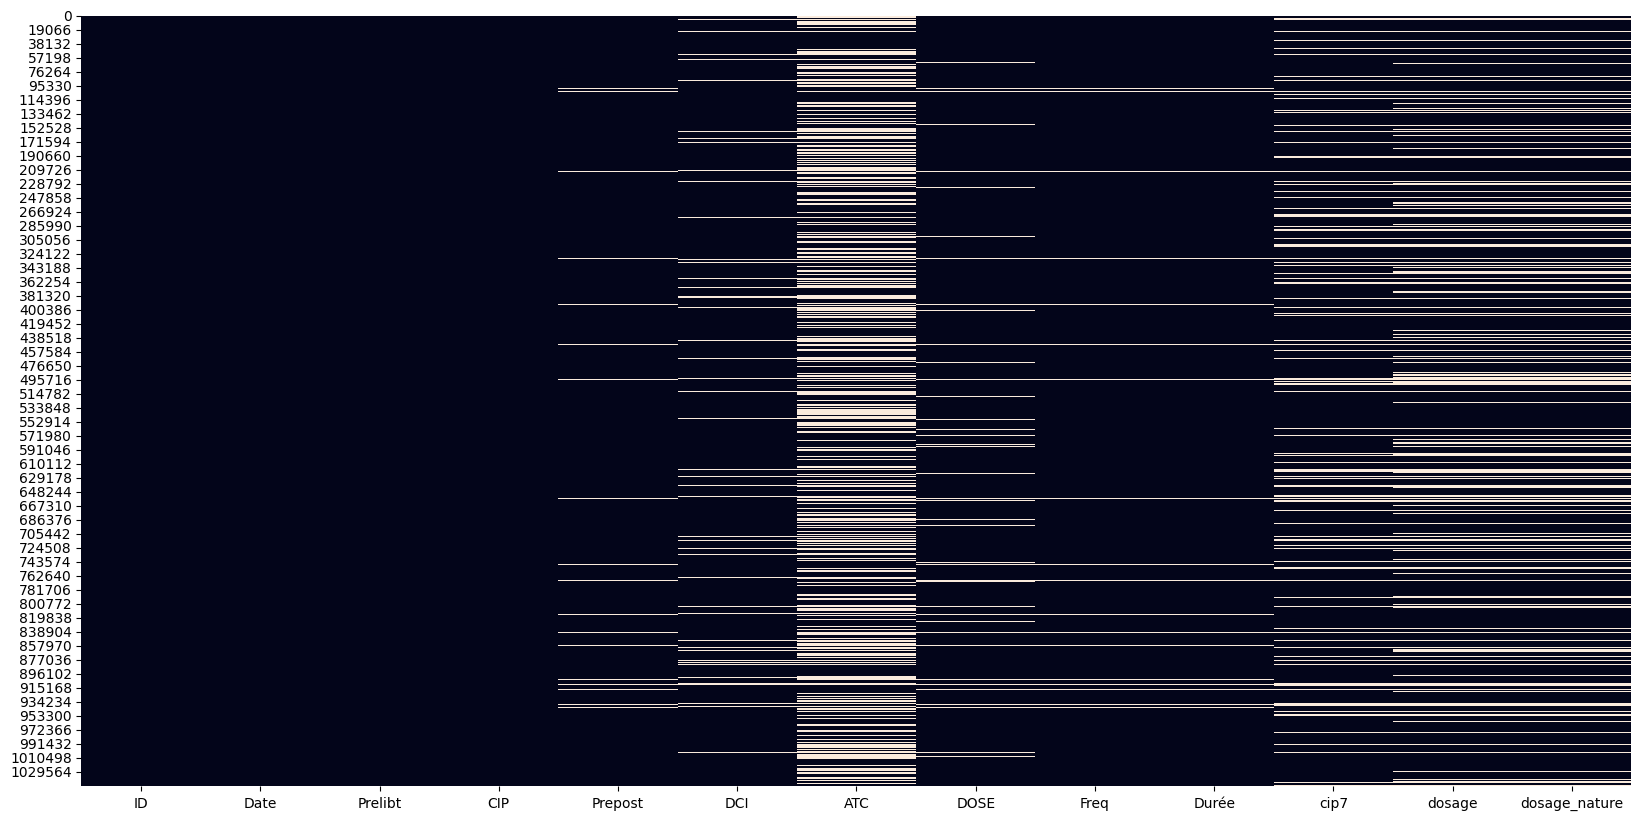

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),cbar=False)

In [173]:
1 - df[df["DCI"].isna()].shape[0]/df.shape[0]

0.9418439310492812

In [181]:
df[df["cip7"].isna()]

,ID,Date,Prelibt,CIP,Prepost,DCI,ATC,DOSE,Freq,Durée,cip7,dosage,dosage_nature
1,1,2004-04-14,KALETRA caps,3566794,"3 Capsule(s), Toutes les 12 heures pendant 30 ...",LOPINAVIR; RITONAVIR,J05AR10,3 Capsule,Toutes les 12 heures,30 jour(s),NaN,NaN,NaN
32,2,2017-08-04,"BENZATHINE 2,4MUI SDZ PDR+SOL IM 1",1062147,"2.4 MUI, par semaine(s) pendant 3 semaine(s)",NaN,NaN,NaN,par semaine(s),3 semaine(s),NaN,NaN,NaN
54,4,2004-01-15,ZERIT gél 40 mg,3413375,NaN,STAVUDINE,J05AF04,NaN,NaN,NaN,NaN,NaN,NaN
56,4,2004-01-15,VIRACEPT 250MG CPR 270,3461718,NaN,NELFINAVIR,J05AE04,NaN,NaN,NaN,NaN,NaN,NaN
57,4,2004-02-20,ZERIT gél 40 mg,3413375,NaN,STAVUDINE,J05AF04,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048549,16524,2015-11-26,DEXERYL CR DERM TUB 250G,3404459,1 application 1 fois par jour pendant 30 jours,NaN,NaN,1 application,1 fois par jour,30 jours,NaN,NaN,NaN
1048557,16524,2015-11-26,CLOPIDOGREL 75MG BIOGARAN CPR 30,3968423,"1 comprimé, par jour(s) pendant 30 jour(s)",HYDROGÉNOSULFATE DE CLOPIDOGREL,B01AC04,1 comprimé,par jour(s),30 jour(s),NaN,NaN,NaN
1048560,16524,2016-04-28,DEXERYL CR DERM TUB 250G,3404459,1 application 1 fois par jour pendant 30 jours,NaN,NaN,1 application,1 fois par jour,30 jours,NaN,NaN,NaN
1048568,16524,2016-04-28,CLOPIDOGREL 75MG BIOGARAN CPR 30,3968423,"1 comprimé, par jour(s) pendant 30 jour(s)",HYDROGÉNOSULFATE DE CLOPIDOGREL,B01AC04,1 comprimé,par jour(s),30 jour(s),NaN,NaN,NaN


# dci cip

In [182]:
df["cip7"] = df["cip7"].astype(str).str.strip()
df_ref["cip7"] = df_ref["cip7"].astype(str).str.strip()


In [183]:
df = df.merge(
    df_ref[["cip7", "dci"]],
    on="cip7",
    how="left",
    suffixes=("", "_ref")
)


MemoryError: Unable to allocate 723. MiB for an array with shape (94729799, 1) and data type object

In [184]:
df["cip7"] = df["cip7"].astype(str).str.strip()
df_ref["cip7"] = df_ref["cip7"].astype(str).str.strip()


In [185]:
df_ref_small = df_ref[["cip7", "dci"]].copy()

df_ref_small["cip7"] = df_ref_small["cip7"].str.split(";")
df_ref_small = df_ref_small.explode("cip7")

df_ref_small["cip7"] = df_ref_small["cip7"].str.strip()


In [186]:
df_ref_small = df_ref_small.drop_duplicates(subset="cip7")


In [188]:
cip_to_dci = dict(zip(df_ref_small["cip7"], df_ref_small["dci"]))

df["DCI"] = df["cip7"].map(cip_to_dci).combine_first(df["DCI"])


In [189]:
df

,ID,Date,Prelibt,CIP,Prepost,DCI,ATC,DOSE,Freq,Durée,cip7,dosage,dosage_nature
0,1,2004-04-14,BACTRIM cp Ad,3001069,"1 Comprimé(s), 1 fois / jour pendant 30 jour(s)",SULFAMÉTHOXAZOLE; TRIMÉTHOPRIME,NaN,1 Comprimé,1 fois / jour,30 jour(s),3001069,400 mg; 80 mg,un comprimé
1,1,2004-04-14,KALETRA caps,3566794,"3 Capsule(s), Toutes les 12 heures pendant 30 ...",A.D.N. POUR PRÉPARATIONS HOMÉOPATHIQUES,J05AR10,3 Capsule,Toutes les 12 heures,30 jour(s),nan,NaN,NaN
2,1,2004-04-14,COMBIVIR cp enrobé,3466271,"1 Comprimé(s), Toutes les 12 heures pendant 30...",LAMIVUDINE; ZIDOVUDINE,J05AR01,1 Comprimé,Toutes les 12 heures,30 jour(s),3466271,150 mg; 300 mg,un comprimé
3,2,2013-10-01,TRUVADA 200MG/245MG CPR 30,3656563,1 comprimé par jour pendant 1 mois,EMTRICITABINE; TÉNOFOVIR DISOPROXIL (FUMARATE DE),J05AR03,1 comprimé,par jour,1 mois,3656563,200 mg; 300 mg,un comprimé
4,2,2013-10-01,ISENTRESS 400MG CPR 60,3830848,2 comprimés par jour pendant 1 mois,RALTÉGRAVIR POTASSIQUE,J05AJ01,2 comprimés,par jour,1 mois,3830848,"434,4 mg",un comprimé
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,16524,2016-04-28,INSPRA 25MG CPR 30,3665705,"1 comprimé, 1 fois par jour(s) pendant 28 jour(s)",ÉPLÉRÉNONE,C03DA04,1 comprimé,1 fois par jour(s),28 jour(s),3665705,25 mg,un comprimé
1048571,16524,2016-12-15,INSPRA 25MG CPR 30,3665705,"1 comprimé, 1 fois par jour(s) pendant 28 jour(s)",ÉPLÉRÉNONE,C03DA04,1 comprimé,1 fois par jour(s),28 jour(s),3665705,25 mg,un comprimé
1048572,16524,2016-12-15,UVEDOSE 100 000UI/2ML AMP BUV 1,3322218,"1 ampoule, tous les 6 mois pendant 6 mois",CHOLÉCALCIFÉROL,NaN,1 ampoule,tous les 6 mois,6 mois,3322218,100 000 UI,une ampoule de 2 mL
1048573,16524,2016-12-15,CLOPIDOGREL 75MG BIOGARAN CPR 30,3968423,"1 comprimé, par jour(s) pendant 30 jour(s)",A.D.N. POUR PRÉPARATIONS HOMÉOPATHIQUES,B01AC04,1 comprimé,par jour(s),30 jour(s),nan,NaN,NaN


In [192]:
df[df["DCI"].isna()].shape

(9283, 13)

In [ ]:
def garder_premier_mot(m):
    return m.strip().split(" ")[0].strip() 
    

df_ref["Med1"] = df_ref["Prelibt"].apply(garder_premier_mot)

In [197]:
h = df[df["DCI"].isna()]
h

,ID,Date,Prelibt,CIP,Prepost,DCI,ATC,DOSE,Freq,Durée,cip7,dosage,dosage_nature
573,5,2018-07-06,"TRAMADOL/PARAC 37,5/325MG ARWL C20",2698080,"1 comprimé, 2 fois par jour(s) pendant 030 jou...",NaN,NaN,1 comprimé,2 fois par jour(s),030 jour(s),2698080,"325 mg; 37,5 mg",un comprimé
577,5,2020-04-02,"TRAMADOL/PARAC 37,5/325MG ARWL C20",2698080,"1 comprimé, 2 fois par jour(s) pendant 030 jou...",NaN,NaN,1 comprimé,2 fois par jour(s),030 jour(s),2698080,"325 mg; 37,5 mg",un comprimé
578,5,2020-05-20,"TRAMADOL/PARAC 37,5/325MG ARWL C20",2698080,"1 comprimé, 2 fois par jour(s) pendant 030 jou...",NaN,NaN,1 comprimé,2 fois par jour(s),030 jour(s),2698080,"325 mg; 37,5 mg",un comprimé
580,5,2021-03-09,"TRAMADOL/PARAC 37,5/325MG ARWL C20",2698080,"1 comprimé, 2 fois par jour(s) pendant 030 jou...",NaN,NaN,1 comprimé,2 fois par jour(s),030 jour(s),2698080,"325 mg; 37,5 mg",un comprimé
581,5,2021-04-14,"TRAMADOL/PARAC 37,5/325MG ARWL C20",2698080,"1 comprimé, 2 fois par jour(s) pendant 030 jou...",NaN,NaN,1 comprimé,2 fois par jour(s),030 jour(s),2698080,"325 mg; 37,5 mg",un comprimé
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046361,16488,2022-11-03,AC ACETYL 100MG MYLAN CPR 30,3018254,"1 comprimé, par jour(s) pendant 1 mois",NaN,NaN,1 comprimé,par jour(s),1 mois,3018254,100 mg,un comprimé
1047248,16508,2017-11-20,ABACAVIR/LAMI 600MG/300MG MYL CP30,3008345,"1 comprimé, par jour(s) pendant 30 jour(s)",NaN,NaN,1 comprimé,par jour(s),30 jour(s),3008345,300 mg,un comprimé
1048321,16522,2018-04-24,EMTRICI/TENO 200/245MG BIOG CPR30,3006941,"1 comprimé, 1 fois par jour(s) pendant 30 jour(s)",NaN,NaN,1 comprimé,1 fois par jour(s),30 jour(s),3006941,"200 mg; 300,6 mg",un comprimé
1048385,16523,2018-07-09,EMTRICI/TENO 200/245MG BIOG CPR30,3006941,"1 comprimé, 1 fois par jour(s) pendant 1 mois",NaN,NaN,1 comprimé,1 fois par jour(s),1 mois,3006941,"200 mg; 300,6 mg",un comprimé


# merg 2 

In [138]:
# Séparer les CIP par ';' et créer une ligne par CIP
df_ref12= df_ref12.assign(cip7=df_ref12["cip7"].str.split(";")).explode("cip7")

In [151]:
df_ref12 = df_ref12.drop_duplicates(subset=['cip7'], keep='first')

In [152]:
df12["CIP"] = df["CIP"].astype(str)
df_ref["cip7"] = df_ref["cip7"].astype(str)

In [153]:
df_ref12["cip7"] = df_ref12["cip7"].str.strip()
df12["CIP"] = df12["CIP"].str.strip()

C:\Users\toufi\AppData\Local\Temp\ipykernel_608\2859201571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ref12["cip7"] = df_ref12["cip7"].str.strip()


In [154]:
df12 = df12.merge(
    df_ref12[["cip7", "dosage", "dosage_nature"]],
    left_on="CIP",
    right_on="cip7",
    how="left"
)


In [21]:
df

,ID,Date,Prelibt,CIP,Prepost,DCI,ATC,DOSE,Freq,Durée,cip7,dci,atc,dosage,dosage_nature
0,1,2004-04-14,BACTRIM cp Ad,3001069,"1 Comprimé(s), 1 fois / jour pendant 30 jour(s)",NaN,NaN,1 Comprimé,1 fois / jour,30 jour(s),3001069,SULFAMÉTHOXAZOLE; TRIMÉTHOPRIME,NaN,400 mg; 80 mg,un comprimé
1,1,2004-04-14,KALETRA caps,3566794,"3 Capsule(s), Toutes les 12 heures pendant 30 ...",NaN,NaN,3 Capsule,Toutes les 12 heures,30 jour(s),NaN,NaN,NaN,NaN,NaN
2,1,2004-04-14,COMBIVIR cp enrobé,3466271,"1 Comprimé(s), Toutes les 12 heures pendant 30...",NaN,NaN,1 Comprimé,Toutes les 12 heures,30 jour(s),3466271,LAMIVUDINE; ZIDOVUDINE,J05AR01,150 mg; 300 mg,un comprimé
3,2,2013-10-01,TRUVADA 200MG/245MG CPR 30,3656563,1 comprimé par jour pendant 1 mois,NaN,NaN,1 comprimé,par jour,1 mois,3656563,EMTRICITABINE; TÉNOFOVIR DISOPROXIL (FUMARATE DE),J05AR03,200 mg; 300 mg,un comprimé
4,2,2013-10-01,ISENTRESS 400MG CPR 60,3830848,2 comprimés par jour pendant 1 mois,NaN,NaN,2 comprimés,par jour,1 mois,3830848,RALTÉGRAVIR POTASSIQUE,J05AJ01,"434,4 mg",un comprimé
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,16524,2016-04-28,INSPRA 25MG CPR 30,3665705,"1 comprimé, 1 fois par jour(s) pendant 28 jour(s)",NaN,NaN,1 comprimé,1 fois par jour(s),28 jour(s),NaN,NaN,NaN,NaN,NaN
1048571,16524,2016-12-15,INSPRA 25MG CPR 30,3665705,"1 comprimé, 1 fois par jour(s) pendant 28 jour(s)",NaN,NaN,1 comprimé,1 fois par jour(s),28 jour(s),NaN,NaN,NaN,NaN,NaN
1048572,16524,2016-12-15,UVEDOSE 100 000UI/2ML AMP BUV 1,3322218,"1 ampoule, tous les 6 mois pendant 6 mois",NaN,NaN,1 ampoule,tous les 6 mois,6 mois,3322218,CHOLÉCALCIFÉROL,NaN,100 000 UI,une ampoule de 2 mL
1048573,16524,2016-12-15,CLOPIDOGREL 75MG BIOGARAN CPR 30,3968423,"1 comprimé, par jour(s) pendant 30 jour(s)",NaN,NaN,1 comprimé,par jour(s),30 jour(s),NaN,NaN,NaN,NaN,NaN


<Axes: >

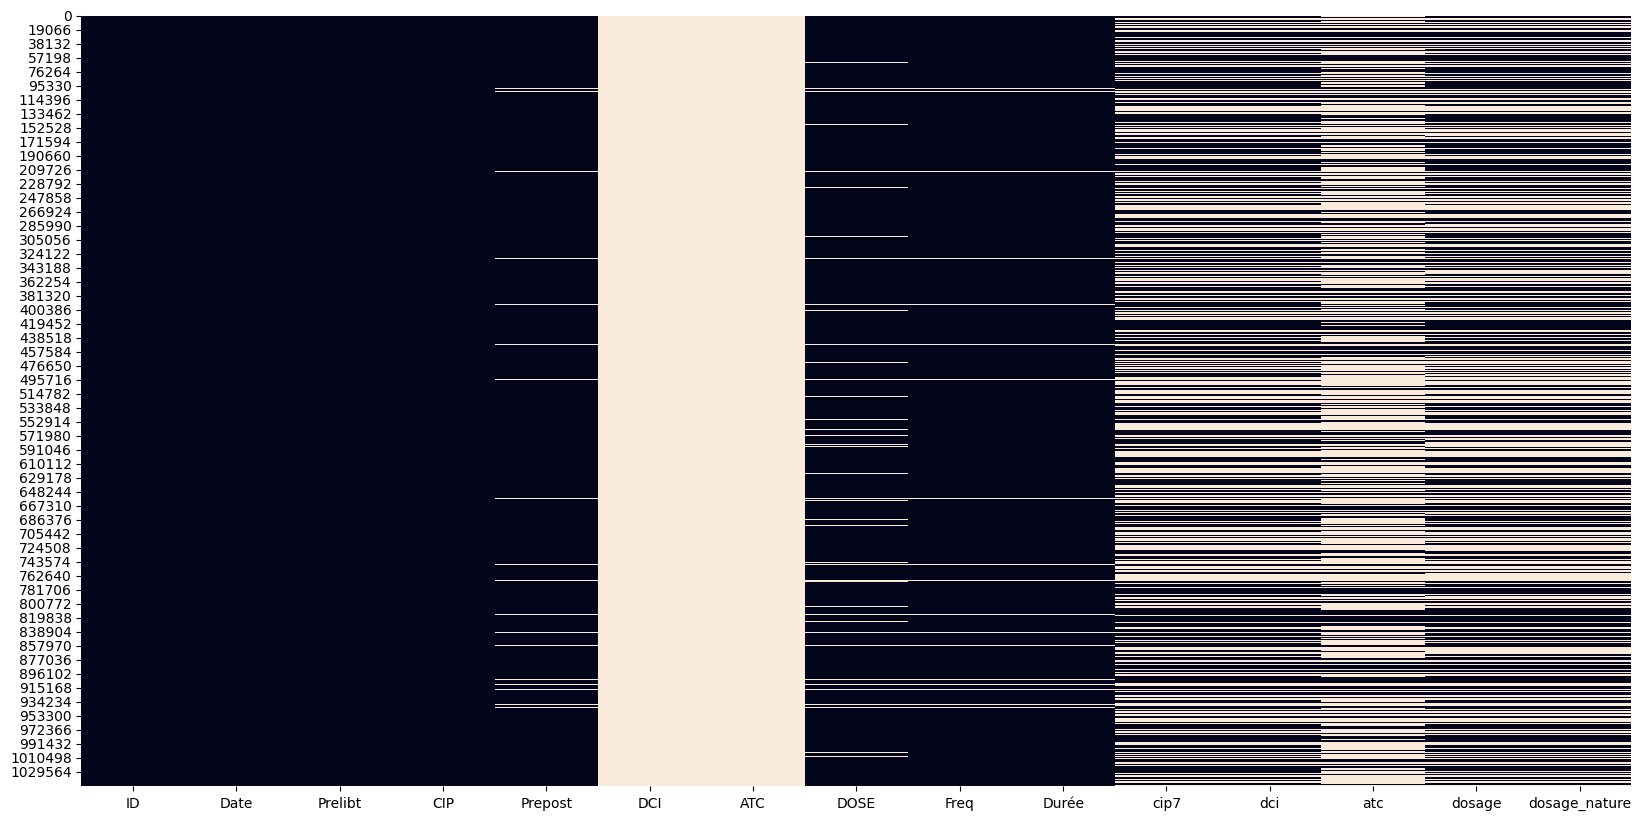

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),cbar=False)

In [24]:
df[df["cip7"].isnull()]

,ID,Date,Prelibt,CIP,Prepost,DCI,ATC,DOSE,Freq,Durée,cip7,dci,atc,dosage,dosage_nature
1,1,2004-04-14,KALETRA caps,3566794,"3 Capsule(s), Toutes les 12 heures pendant 30 ...",NaN,NaN,3 Capsule,Toutes les 12 heures,30 jour(s),NaN,NaN,NaN,NaN,NaN
14,2,2014-08-26,VALACICLOVIR 500MG ALTER CPR 42,3842308,"2 comprimés, par jour(s) pendant 7 jour(s)",NaN,NaN,2 comprimés,par jour(s),7 jour(s),NaN,NaN,NaN,NaN,NaN
32,2,2017-08-04,"BENZATHINE 2,4MUI SDZ PDR+SOL IM 1",1062147,"2.4 MUI, par semaine(s) pendant 3 semaine(s)",NaN,NaN,NaN,par semaine(s),3 semaine(s),NaN,NaN,NaN,NaN,NaN
35,2,2018-06-25,ZELITREX 500MG CPR 10,3417083,"500 mg, 2 fois par jour(s) pendant 10 jour(s)",NaN,NaN,500 mg,2 fois par jour(s),10 jour(s),NaN,NaN,NaN,NaN,NaN
41,2,2021-03-15,BIKTARVY 50MG/200MG/25MG CPR FL 30,3015303,"1 comprimé, 1 fois par jour(s) pendant 6 mois",NaN,NaN,1 comprimé,1 fois par jour(s),6 mois,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048566,16524,2016-04-28,TRANDOLAPRIL 4MG BIOG GELULE 28,3881596,"1 gélule, 1 fois par jour(s) pendant 30 jour(s)",NaN,NaN,1 gélule,1 fois par jour(s),30 jour(s),NaN,NaN,NaN,NaN,NaN
1048568,16524,2016-04-28,CLOPIDOGREL 75MG BIOGARAN CPR 30,3968423,"1 comprimé, par jour(s) pendant 30 jour(s)",NaN,NaN,1 comprimé,par jour(s),30 jour(s),NaN,NaN,NaN,NaN,NaN
1048570,16524,2016-04-28,INSPRA 25MG CPR 30,3665705,"1 comprimé, 1 fois par jour(s) pendant 28 jour(s)",NaN,NaN,1 comprimé,1 fois par jour(s),28 jour(s),NaN,NaN,NaN,NaN,NaN
1048571,16524,2016-12-15,INSPRA 25MG CPR 30,3665705,"1 comprimé, 1 fois par jour(s) pendant 28 jour(s)",NaN,NaN,1 comprimé,1 fois par jour(s),28 jour(s),NaN,NaN,NaN,NaN,NaN


# merg 3

In [68]:
df.shape

(1048575, 11)

In [69]:
df_ref["Med1"].unique().shape

(4802,)

In [89]:
df_ref = df_ref.drop_duplicates(subset=['Med1'], keep='first')

In [16]:
def garder_premier_mot(m):
    return m.strip().split(" ")[0].strip() 
    

df_ref["Med1"] = df_ref["nom_commercial"].apply(garder_premier_mot)

In [86]:
import unidecode


df["Med"] = (
    df["Med"]
    .astype(str)
    .apply(lambda x: unidecode.unidecode(x))  # enlever les accents
    .str.upper()                              # mettre en majuscules
    .str.strip()                              # enlever les espaces autour
    .str.replace(r"[^\w\s]", "", regex=True)  # supprimer toutes ponctuations (virgules, points, etc.)
)

In [71]:
df["Med"] = df["Med"].astype(str)
df_ref["Med1"] = df_ref["Med1"].astype(str)



In [90]:

df12 = df.merge(
    df_ref[["Med1","dci", "atc"]],
    left_on="Med",
    right_on="Med1",
    how="left"
)

In [91]:
df12.shape

(1048575, 14)

<Axes: >

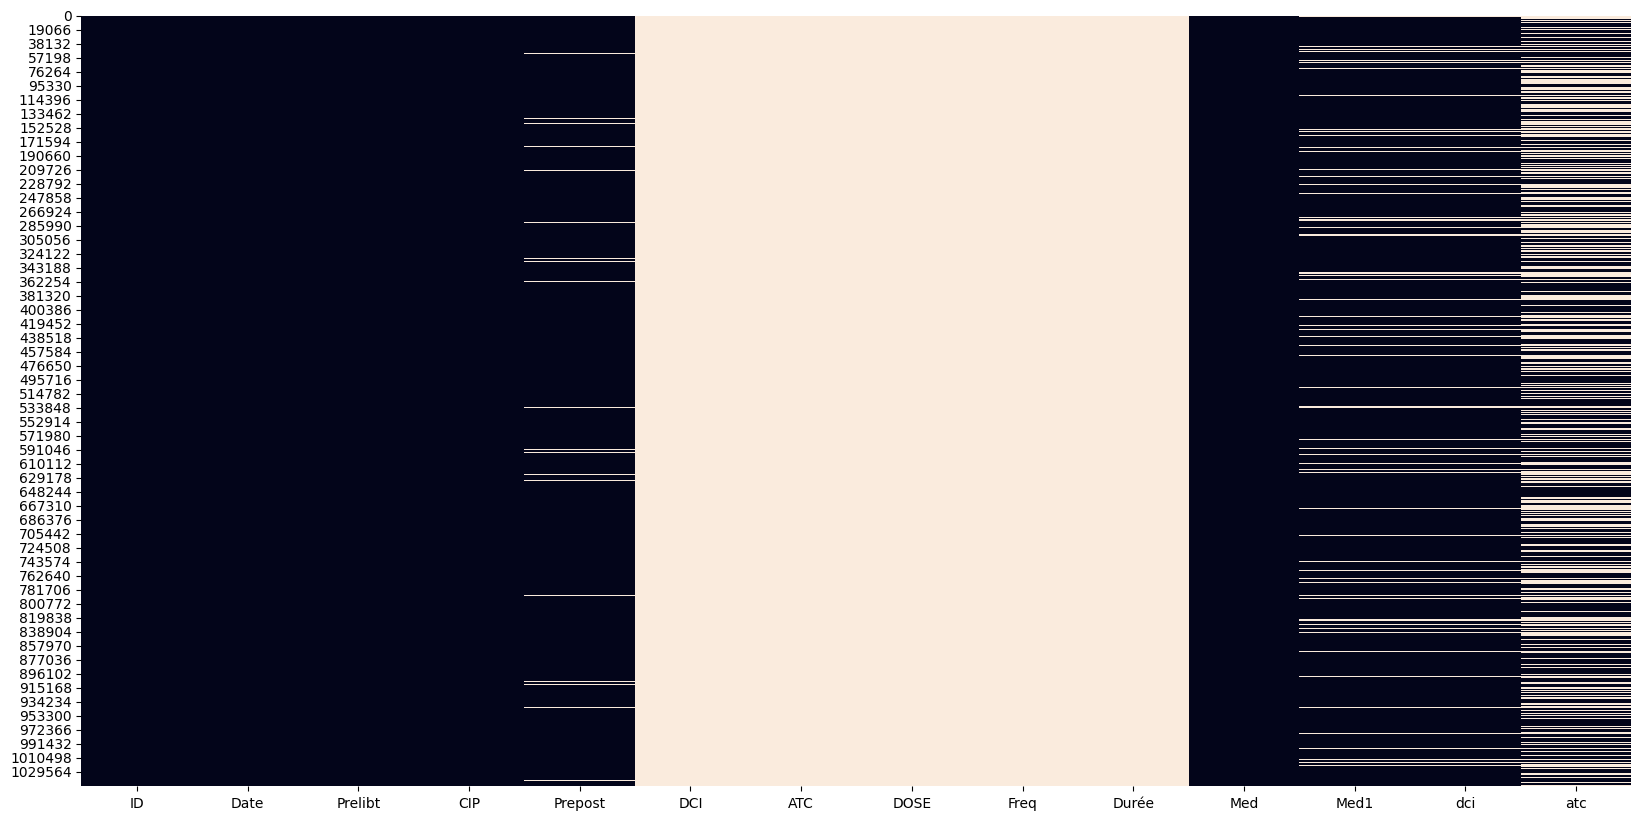

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10))
sns.heatmap(df12.isnull(),cbar=False)

In [102]:
dci_null = df12[df12["dci"].isnull()]

In [117]:
vvv=df12[df12["dci"].isnull()]
vvv["Med"].unique().shape

(951,)

In [114]:
dci_null["Med"].unique().shape


(1019,)

In [106]:
from unidecode import unidecode
df_ref["dci_clean"] = df_ref["dci"].astype(str).apply(lambda x: unidecode(x).upper().strip() if pd.notna(x) else x)

In [107]:
# Créer un set de dci existants dans df_ref pour vérification rapide
dci_set = set(df_ref["dci_clean"].dropna())

In [110]:
# Parcourir df12 et remplir dci si le Med correspond à un dci dans df_ref
def fill_dci(row):
    if pd.isna(row["dci"]):
        if row["Med"] in dci_set:
            return row["Med"]
    return row["dci"]

df12["dci"] = df12.apply(fill_dci, axis=1)

In [119]:
df12["DCI"]=df12["dci"]
df12["ATC"]=df12["atc"]


In [125]:
df12 = df12.drop("Med",axis=1)

In [148]:
df12=df12.iloc[:,:10]


In [155]:
df12

,ID,Date,Prelibt,CIP,Prepost,DCI,ATC,DOSE,Freq,Durée,cip7,dosage,dosage_nature
0,1,2004-04-14,BACTRIM cp Ad,3001069,"1 Comprimé(s), 1 fois / jour pendant 30 jour(s)",SULFAMÉTHOXAZOLE; TRIMÉTHOPRIME,NaN,NaN,NaN,NaN,3001069,400 mg; 80 mg,un comprimé
1,1,2004-04-14,KALETRA caps,3566794,"3 Capsule(s), Toutes les 12 heures pendant 30 ...",LOPINAVIR; RITONAVIR,J05AR10,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2004-04-14,COMBIVIR cp enrobé,3466271,"1 Comprimé(s), Toutes les 12 heures pendant 30...",LAMIVUDINE; ZIDOVUDINE,J05AR01,NaN,NaN,NaN,3466271,150 mg; 300 mg,un comprimé
3,2,2013-10-01,TRUVADA 200MG/245MG CPR 30,3656563,1 comprimé par jour pendant 1 mois,EMTRICITABINE; TÉNOFOVIR DISOPROXIL (FUMARATE DE),J05AR03,NaN,NaN,NaN,3656563,200 mg; 300 mg,un comprimé
4,2,2013-10-01,ISENTRESS 400MG CPR 60,3830848,2 comprimés par jour pendant 1 mois,RALTÉGRAVIR POTASSIQUE,J05AJ01,NaN,NaN,NaN,3830848,"434,4 mg",un comprimé
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,16524,2016-04-28,INSPRA 25MG CPR 30,3665705,"1 comprimé, 1 fois par jour(s) pendant 28 jour(s)",ÉPLÉRÉNONE,C03DA04,NaN,NaN,NaN,3665705,25 mg,un comprimé
1048571,16524,2016-12-15,INSPRA 25MG CPR 30,3665705,"1 comprimé, 1 fois par jour(s) pendant 28 jour(s)",ÉPLÉRÉNONE,C03DA04,NaN,NaN,NaN,3665705,25 mg,un comprimé
1048572,16524,2016-12-15,UVEDOSE 100 000UI/2ML AMP BUV 1,3322218,"1 ampoule, tous les 6 mois pendant 6 mois",CHOLÉCALCIFÉROL,NaN,NaN,NaN,NaN,3322218,100 000 UI,une ampoule de 2 mL
1048573,16524,2016-12-15,CLOPIDOGREL 75MG BIOGARAN CPR 30,3968423,"1 comprimé, par jour(s) pendant 30 jour(s)",HYDROGÉNOSULFATE DE CLOPIDOGREL,B01AC04,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
df_ref.to_excel("data/out/bbdd00.xlsx")

# trait

In [6]:
import re
from difflib import get_close_matches
import unicodedata

# ----------------------------------------------------------------
# FONCTION : Normaliser les textes
# ----------------------------------------------------------------
def normaliser_texte(texte):
    """
    Convertit en majuscules ET supprime les accents
    
    """
    if not texte:
        return ""
    # Mettre en majuscules
    texte = str(texte).upper()
    # Supprimer les accents (NFD = décompose les accents, puis on les retire)
    texte = unicodedata.normalize('NFD', texte)
    texte = ''.join(char for char in texte if unicodedata.category(char) != 'Mn')
    return texte


In [24]:

# ----------------------------------------------------------------
# 1. Charger le dictionnaire VIH
# ----------------------------------------------------------------
df_ref = pd.read_excel("data/bdd.xlsx")
print(f"→ {len(df_ref)} médicaments dans le dictionnaire VIH")
print(f"→ {len(df)} lignes à traiter dans df")

# ----------------------------------------------------------------
# 2. Préparation du dictionnaire VIH (AVEC NORMALISATION)
# ----------------------------------------------------------------
df_ref["nom_commercial"] = df_ref["nom_commercial"].fillna("").astype(str)
df_ref["dci"] = df_ref["dci"].fillna("").astype(str)

df_ref_unique = df_ref[df_ref["dci"] != ""].drop_duplicates(subset=["nom_commercial"])
print(f"→ {len(df_ref_unique)} médicaments uniques après filtrage")

# Créer un dictionnaire optimisé : clé = nom_base NORMALISÉ, valeur = dci
dci_dict = {}
for _, row in df_ref_unique.iterrows():
    nom = row["nom_commercial"].strip()
    dci = row["dci"].strip()
    if nom and dci:
        #  CHANGEMENT ICI : utiliser normaliser_texte()
        nom_base = re.split(r'\s+\d|,|\s+\(', nom)[0].strip()
        nom_base_normalise = normaliser_texte(nom_base)  # ← NOUVEAU
        
        if nom_base_normalise not in dci_dict:
            dci_dict[nom_base_normalise] = dci

print(f"→ {len(dci_dict)} noms de base uniques indexés")

# Set des DCI pour recherche rapide (NORMALISÉ AUSSI)
dci_set = set()
for d in df_ref_unique["dci"]:
    if d:
        d_normalise = normaliser_texte(d)  # ← NOUVEAU
        dci_set.add(d_normalise.lower())
        for comp in re.split(r"[\+/]", d):
            comp = comp.strip()
            if comp:
                comp_normalise = normaliser_texte(comp)  # ← NOUVEAU
                dci_set.add(comp_normalise.lower())


→ 15965 médicaments dans le dictionnaire VIH
→ 1048575 lignes à traiter dans df
→ 15661 médicaments uniques après filtrage
→ 9430 noms de base uniques indexés


In [25]:
# ----------------------------------------------------------------
# 3. Fonction de recherche DCI OPTIMISÉE (AVEC NORMALISATION)
# ----------------------------------------------------------------
def chercher_dci_optimise(med_str):
    if not med_str or not str(med_str).strip():
        return None
    
    med_str = str(med_str).strip()
    
    # CHANGEMENT ICI : normaliser avant de chercher
    cle = med_str.split()[0].strip()
    cle_normalise = normaliser_texte(cle)  # ← NOUVEAU
    cle_lower = cle_normalise.lower()
    
    # 1. Recherche directe dans le dictionnaire
    if cle_normalise in dci_dict:
        return dci_dict[cle_normalise]
    
    # 2. Recherche par préfixe
    for nom_base, dci in dci_dict.items():
        if nom_base.startswith(cle_normalise) or cle_normalise.startswith(nom_base):
            return dci
    
    # # 3. Matching approximatif sur les clés
    # match = get_close_matches(cle_normalise, dci_dict.keys(), n=1, cutoff=0.8)
    # if match:
    #     return dci_dict[match[0]]
    
    # 4. Vérifier si c'est déjà une DCI
    if cle_lower in dci_set:
        for nom_base, dci in dci_dict.items():
            if cle_lower in normaliser_texte(dci).lower():
                return dci
    
    # # 5. Matching approximatif dans les DCI
    # match = get_close_matches(cle_lower, list(dci_set), n=1, cutoff=0.8)
    # if match:
    #     for nom_base, dci in dci_dict.items():
    #         if match[0] in normaliser_texte(dci).lower():
    #             return dci
    
    return None


In [26]:
# ----------------------------------------------------------------
# 4. Traitement des valeurs uniques
# ----------------------------------------------------------------
print("\n" + "="*60)
print("ÉTAPE 1 : Traitement des valeurs uniques de Prelibt")
print("="*60)

valeurs_uniques = df["Prelibt"].dropna().unique()
print(f"→ {len(valeurs_uniques)} valeurs uniques à traiter")

mapping_dci = {}
for i, val in enumerate(valeurs_uniques, 1):
    if i % 1000 == 0:
        print(f"  Progression : {i}/{len(valeurs_uniques)} ({i/len(valeurs_uniques)*100:.1f}%)")
    dci_trouve = chercher_dci_optimise(val)
    mapping_dci[val] = dci_trouve

nb_trouves_unique = sum(1 for v in mapping_dci.values() if v is not None)
print(f"Terminé : {nb_trouves_unique}/{len(valeurs_uniques)} DCI trouvées")


ÉTAPE 1 : Traitement des valeurs uniques de Prelibt
→ 16001 valeurs uniques à traiter
  Progression : 1000/16001 (6.2%)
  Progression : 2000/16001 (12.5%)
  Progression : 3000/16001 (18.7%)
  Progression : 4000/16001 (25.0%)
  Progression : 5000/16001 (31.2%)
  Progression : 6000/16001 (37.5%)
  Progression : 7000/16001 (43.7%)
  Progression : 8000/16001 (50.0%)
  Progression : 9000/16001 (56.2%)
  Progression : 10000/16001 (62.5%)
  Progression : 11000/16001 (68.7%)
  Progression : 12000/16001 (75.0%)
  Progression : 13000/16001 (81.2%)
  Progression : 14000/16001 (87.5%)
  Progression : 15000/16001 (93.7%)
  Progression : 16000/16001 (100.0%)
Terminé : 14424/16001 DCI trouvées


In [27]:
# ----------------------------------------------------------------
# 5. Application du mapping sur tout le DataFrame
# ----------------------------------------------------------------
print("\n" + "="*60)
print("ÉTAPE 2 : Application du mapping sur tout le DataFrame")
print("="*60)

df["DCI"] = df["Prelibt"].map(mapping_dci)

nb_total_trouves = df["DCI"].notna().sum()
nb_total_vides = df["DCI"].isna().sum()

print(f"Normalisation terminée")
print(f"  → Lignes avec DCI : {nb_total_trouves:,} ({nb_total_trouves/len(df)*100:.1f}%)")
print(f"  → Lignes sans DCI : {nb_total_vides:,} ({nb_total_vides/len(df)*100:.1f}%)")



ÉTAPE 2 : Application du mapping sur tout le DataFrame
Normalisation terminée
  → Lignes avec DCI : 1,012,121 (96.5%)
  → Lignes sans DCI : 36,454 (3.5%)


In [29]:
top_meds = df.groupby(["Prelibt", "DCI"]).size().reset_index(name="count").sort_values("count", ascending=False).head(10)
top_meds

,Prelibt,DCI,count
13352,UVEDOSE 100 000UI/2ML AMP BUV 1,CHOLÉCALCIFÉROL,59506
9280,NORVIR 100MG CPR 30,RITONAVIR,40394
13105,TRUVADA 200MG/245MG CPR 30,EMTRICITABINE; TÉNOFOVIR DISOPROXIL (FUMARATE DE),39317
10549,PREZISTA 800MG CPR 30,ÉTHANOLATE DE DARUNAVIR,18731
7098,KIVEXA 600MG/300MG CPR 30,ABACAVIR (SULFATE D'); LAMIVUDINE,18658
6769,ISENTRESS 400MG CPR 60,RALTÉGRAVIR POTASSIQUE,18090
13076,TRIUMEQ 50MG/600MG/300MG CPR 30,DOLUTÉGRAVIR SODIQUE; LAMIVUDINE; SULFATE D'AB...,16534
4923,EVIPLERA 200MG/25MG/245MG CPR 30,EMTRICITABINE; FUMARATE DE TÉNOFOVIR DISOPROXI...,14823
12776,TIVICAY 50MG CPR 30,DOLUTÉGRAVIR SODIQUE,12992
11214,REYATAZ 300MG GELULE 30,ATAZANAVIR (SULFATE D'),11724


In [38]:
import pandas as pd

print("="*60)
print("REMPLISSAGE DE LA COLONNE ATC")
print("="*60)

# ------------------------------------------------------------------
# 1. Charger le dictionnaire VIH
# ------------------------------------------------------------------
df_ref = pd.read_excel("data/bdd.xlsx")

print(f"→ {len(df_ref)} médicaments dans le dictionnaire VIH")
print(f"→ {len(df)} lignes à traiter dans df")

# ------------------------------------------------------------------
# 2. Préparation du dictionnaire DCI -> ATC
# ------------------------------------------------------------------
df_ref["dci"] = df_ref["dci"].fillna("").astype(str)
df_ref["atc"] = df_ref["atc"].fillna("").astype(str)

# Créer un dictionnaire de correspondance DCI -> ATC
dci_to_atc = {}

for _, row in df_ref.iterrows():
    dci = row["dci"].strip()
    atc = row["atc"].strip()
    
    if dci and atc:
        # Normaliser la clé en minuscule pour recherche insensible à la casse
        dci_to_atc[dci.lower()] = atc

print(f"✓ Dictionnaire DCI->ATC chargé : {len(dci_to_atc)} correspondances")

# ------------------------------------------------------------------
# 3. Fonction de recherche ATC
# ------------------------------------------------------------------

def chercher_atc(dci_value):
    if not dci_value or pd.isna(dci_value) or not str(dci_value).strip():
        return None
    
    dci_str = str(dci_value).strip().lower()
    
    # Recherche exacte
    if dci_str in dci_to_atc:
        return dci_to_atc[dci_str]
    
    # Recherche partielle (si le DCI contient plusieurs composants séparés par + ou /)
    # On prend le premier ATC trouvé
    for dci_key, atc_value in dci_to_atc.items():
        if dci_key in dci_str or dci_str in dci_key:
            return atc_value
    
    return None

# ------------------------------------------------------------------
# 4. Appliquer sur le DataFrame df
# ------------------------------------------------------------------

print("\nTraitement en cours...")
df["ATC"] = df["DCI"].apply(chercher_atc)

nb_trouves = df["ATC"].notna().sum()
nb_vides = df["ATC"].isna().sum()

print(f"Remplissage ATC terminé")
print(f"  → Trouvés : {nb_trouves}")
print(f"  → Non trouvés (laissés vides) : {nb_vides}")

print("="*60)


REMPLISSAGE DE LA COLONNE ATC
→ 15965 médicaments dans le dictionnaire VIH
→ 1048575 lignes à traiter dans df
✓ Dictionnaire DCI->ATC chargé : 1718 correspondances

Traitement en cours...
Remplissage ATC terminé
  → Trouvés : 939834
  → Non trouvés (laissés vides) : 108741


In [39]:
df

,ID,Date,Prelibt,CIP,Prepost,DCI,ATC,DOSE,Freq,Durée
0,1,2004-04-14,BACTRIM cp Ad,3001069,"1 Comprimé(s), 1 fois / jour pendant 30 jour(s)",SULFAMÉTHOXAZOLE; TRIMÉTHOPRIME,J01EE01,1 Comprimé,1 fois / jour,30 jour(s)
1,1,2004-04-14,KALETRA caps,3566794,"3 Capsule(s), Toutes les 12 heures pendant 30 ...",LOPINAVIR; RITONAVIR,J05AR10,3 Capsule,Toutes les 12 heures,30 jour(s)
2,1,2004-04-14,COMBIVIR cp enrobé,3466271,"1 Comprimé(s), Toutes les 12 heures pendant 30...",LAMIVUDINE; ZIDOVUDINE,J05AR01,1 Comprimé,Toutes les 12 heures,30 jour(s)
3,2,2013-10-01,TRUVADA 200MG/245MG CPR 30,3656563,1 comprimé par jour pendant 1 mois,EMTRICITABINE; TÉNOFOVIR DISOPROXIL (FUMARATE DE),J05AR03,1 comprimé,par jour,1 mois
4,2,2013-10-01,ISENTRESS 400MG CPR 60,3830848,2 comprimés par jour pendant 1 mois,RALTÉGRAVIR POTASSIQUE,J05AJ01,2 comprimés,par jour,1 mois
...,...,...,...,...,...,...,...,...,...,...
1048570,16524,2016-04-28,INSPRA 25MG CPR 30,3665705,"1 comprimé, 1 fois par jour(s) pendant 28 jour(s)",ÉPLÉRÉNONE,C03DA04,1 comprimé,1 fois par jour(s),28 jour(s)
1048571,16524,2016-12-15,INSPRA 25MG CPR 30,3665705,"1 comprimé, 1 fois par jour(s) pendant 28 jour(s)",ÉPLÉRÉNONE,C03DA04,1 comprimé,1 fois par jour(s),28 jour(s)
1048572,16524,2016-12-15,UVEDOSE 100 000UI/2ML AMP BUV 1,3322218,"1 ampoule, tous les 6 mois pendant 6 mois",CHOLÉCALCIFÉROL,A11CC05,1 ampoule,tous les 6 mois,6 mois
1048573,16524,2016-12-15,CLOPIDOGREL 75MG BIOGARAN CPR 30,3968423,"1 comprimé, par jour(s) pendant 30 jour(s)",HYDROGÉNOSULFATE DE CLOPIDOGREL,B01AC04,1 comprimé,par jour(s),30 jour(s)


In [40]:
100 - (df[df['DCI'].isnull()][['Prelibt']].shape[0])*100/df.shape[0]

96.52347233149752

<Axes: >

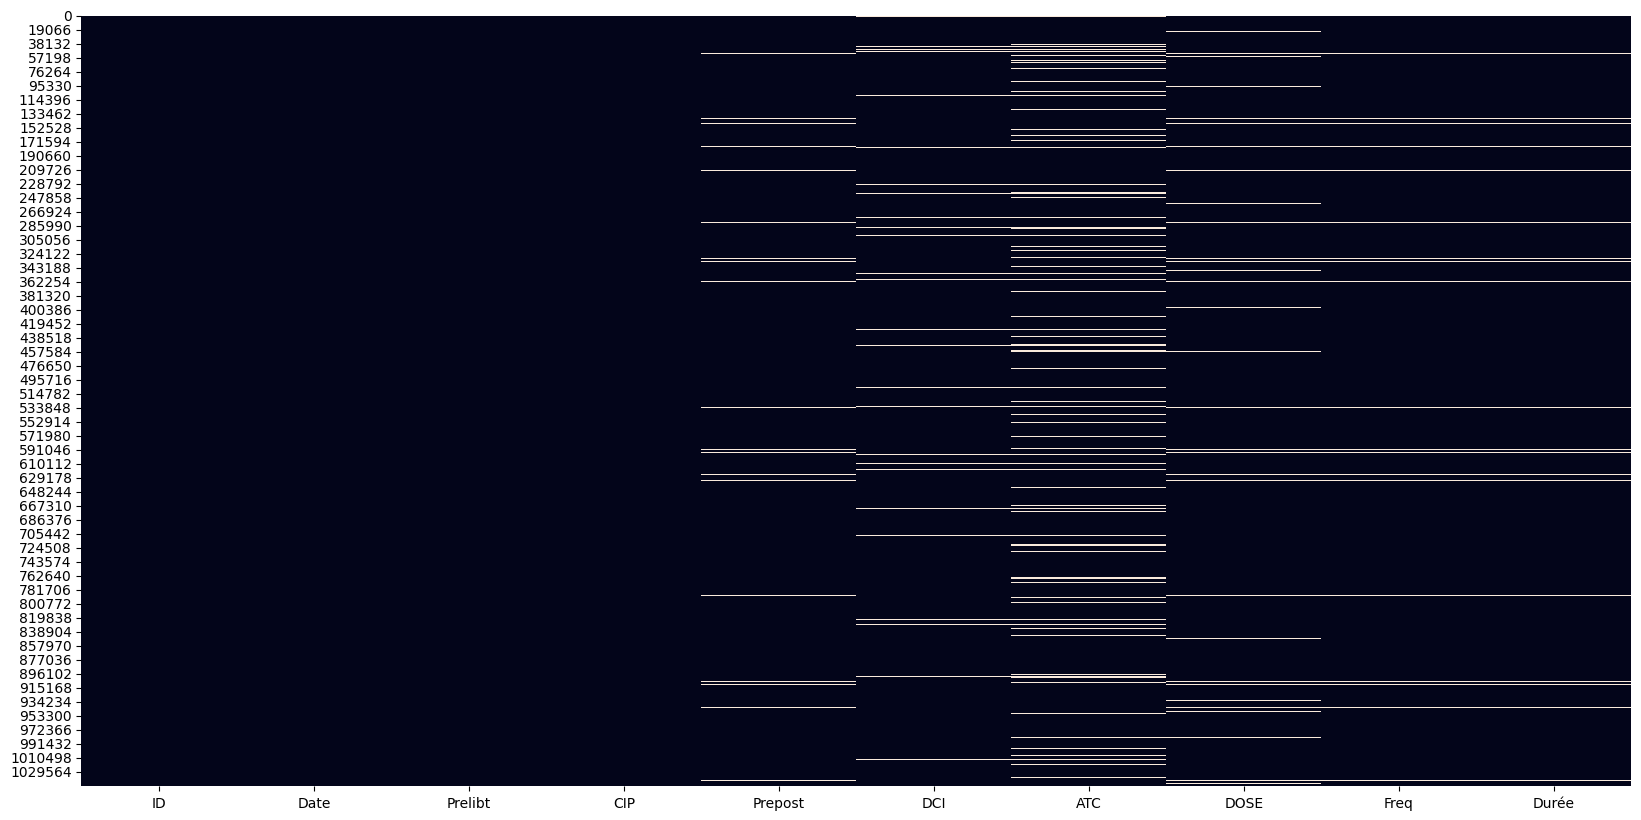

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),cbar=False)

In [42]:
df.to_excel("data/out/result2.xlsx",index=False)

In [43]:
introuvable = df[df['DCI'].isna()][['Prelibt']]

In [44]:
introuvable["Prelibt"].unique().shape 

(1577,)

In [45]:
introuvable.shape

(36454, 1)

In [46]:
introuvable.value_counts()
introuvable

,Prelibt
32,"BENZATHINE 2,4MUI SDZ PDR+SOL IM 1"
257,DEXERYL CR DERM TUB 250G
258,"SODIUM BICARB 1,4% AGUET 1L 6"
274,DEXERYL CR DERM TUB 250G
275,"SODIUM BICARB 1,4% AGUET 1L 6"
...,...
1048515,DEXERYL CR DERM TUB 250G
1048526,DEXERYL CR DERM TUB 250G
1048538,DEXERYL CR DERM TUB 250G
1048549,DEXERYL CR DERM TUB 250G


In [19]:
introuvable["nom_base"] = introuvable["Prelibt"].str.split().str[0]
introuvable["nom_base"].unique().shape
introuvable[["nom_base"]].value_counts()
introuvable_11 =introuvable[["nom_base"]].value_counts().reset_index()
introuvable_11.columns = ["nom_base", "count"]

In [47]:
introuvable_11

,nom_base,count
0,DEXERYL,14257
1,EMTRICI/TENO,2442
2,CLINUTREN,1940
3,GLYCEROL/VASEL/PARA,1673
4,MASQUE,1613
...,...,...
593,PHARYNDOL,1
594,DOLGIT,1
595,PHOTODERM,1
596,DOCULYSE,1


In [21]:
introuvable_11.to_excel("data/out/INTROUVABLE_pr.xlsx",index=False)